<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS8_113_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Synonyms for Y Variable:
- the thing that we want to predict
- label
- target
- dependent variable 
- predicted variable
- outputs
- response variable

## Synonyms for X Variable: 
- Predictors 
- independent variables
- inputs
- control

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

# Sets Random Seed for Reproducibility
random.seed(42)

users = []

for _ in range(2500):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(7500):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=509.416187933058, mobile=False), User(purchased=False, time_on_site=191.82566237541744, mobile=True), User(purchased=False, time_on_site=452.0246712066497, mobile=False), User(purchased=False, time_on_site=171.38143869888478, mobile=False), User(purchased=False, time_on_site=597.381444476765, mobile=False), User(purchased=True, time_on_site=35.15185418613914, mobile=True), User(purchased=True, time_on_site=144.6119813893192, mobile=True), User(purchased=False, time_on_site=150.9757982065105, mobile=True), User(purchased=False, time_on_site=229.66268044260147, mobile=False), User(purchased=False, time_on_site=573.7129554027825, mobile=False)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,509.416188,False
1,False,191.825662,True
2,False,452.024671,False
3,False,171.381439,False
4,False,597.381444,False


In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.00279642281481,5.025241473759988,5.054380434289009,5.146061213803238,5.167259591466299,5.17585544652597,5.191759604407825,5.193114635237504,5.248746792149076,5.288562900732693,5.295312290861409,5.323725027312455,5.439577394735216,5.444779464938038,5.465680387443639,5.4951549819534975,5.628629799220321,5.642735616904634,5.664181865412473,5.807505517126516,5.824698882557048,5.892932585916332,5.906862059779251,5.943324589163366,5.9756712869185264,5.981824519542817,6.090636316212112,6.097913484477176,6.133134869679523,6.1354094737828735,6.212411424066756,6.236429236976141,6.348162178133177,6.382365757368867,6.424628838828278,6.449180879309817,6.521988813566926,6.55951455992685,6.612670521885143,6.643063355781841,...,592.7970586092715,592.9903367212349,593.0636163031444,593.1155765019158,593.3128991469864,593.748133299305,593.8187768755912,593.9676794472431,594.1184436754107,594.2374886674392,594.4992060406652,594.5133625178112,595.0034808240367,595.4317122431796,595.6883057398695,595.7377359877075,595.7853931627186,595.8346915953672,596.1130856371782,596.4116923990299,596.4350337479841,596.5768396856306,596.8613378576682,597.0643579789552,597.1381204299279,597.381444476765,597.4546221368852,597.7116143416571,598.2059693634536,598.2141307602859,598.5067687511946,598.547187832115,598.908852686099,599.088120104121,599.2496232569925,599.5766563635087,599.7474841405088,599.7610759212882,599.9407360122243,599.9456188204334
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,...,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0
True,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1


In [0]:
# use .__version__ to look at the version of a specific library/package
pd.__version__

'0.23.4'

In [0]:
# Use pip freeze to view all of the libraries/packages that are installed on our
# Google Colab instance
!pip freeze

In [0]:
# Run !pip install to revert back to an earlier version of pandas
# We will need to restart our runtime for the changes to take full effect.
# !pip install pandas==0.23.4

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 6)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.408, 104.16]","(104.16, 203.317]","(203.317, 302.474]","(302.474, 401.631]","(401.631, 500.788]","(500.788, 599.946]"
purchased,,,,,,
False,2015,1855,1631,285,253,208
True,890,1054,1299,148,179,183


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.408, 104.16]","(104.16, 203.317]","(203.317, 302.474]","(302.474, 401.631]","(401.631, 500.788]","(500.788, 599.946]"
purchased,,,,,,
False,0.693632,0.637676,0.556655,0.658199,0.585648,0.531969
True,0.306368,0.362324,0.443345,0.341801,0.414352,0.468031


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.7056,0.597733
True,0.2944,0.402267


## Three-Variable Crosstab

In [0]:
pd.crosstab(user_data['purchased'], [user_data['mobile'], time_bins], normalize='columns')

mobile                 False        ...                      True 
time_on_site (4.408, 104.16]        ...         (203.317, 302.474]
purchased                           ...                           
False               0.877551        ...                   0.521965
True                0.122449        ...                   0.478035

[2 rows x 9 columns]

In [0]:
pd.crosstab(user_data['purchased'], [user_data['mobile'], time_bins], normalize='columns')

mobile                  False        ...                      True 
time_on_site (5.196, 104.754]        ...         (203.718, 302.683]
purchased                            ...                           
False                0.891892        ...                   0.537849
True                 0.108108        ...                   0.462151

[2 rows x 9 columns]

In [0]:
crosstab = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')
crosstab

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.408, 104.16]     0.195011  0.372741  0.065217  0.279085
(104.16, 203.317]   0.198413  0.335713  0.103261  0.324163
(203.317, 302.474]  0.183673  0.291546  0.138587  0.396752
(302.474, 401.631]  0.161565  0.000000  0.201087  0.000000
(401.631, 500.788]  0.143424  0.000000  0.243207  0.000000
(500.788, 599.946]  0.117914  0.000000  0.248641  0.000000

In [0]:
type(crosstab)

pandas.core.frame.DataFrame

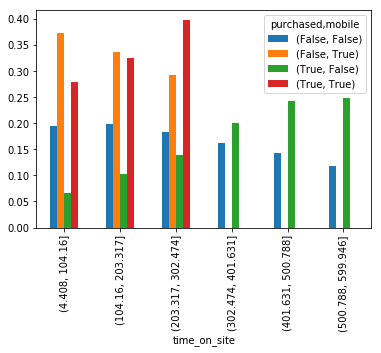

In [0]:
crosstab.plot(kind='bar')

In [0]:
crosstab_final = crosstab.iloc[:,[2,3]]
crosstab_final

purchased               True          
mobile                 False     True 
time_on_site                          
(4.408, 104.16]     0.065217  0.279085
(104.16, 203.317]   0.103261  0.324163
(203.317, 302.474]  0.138587  0.396752
(302.474, 401.631]  0.201087  0.000000
(401.631, 500.788]  0.243207  0.000000
(500.788, 599.946]  0.248641  0.000000

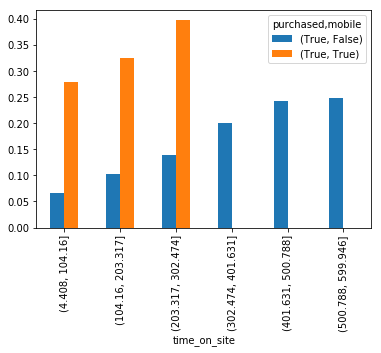

In [0]:
crosstab_final.plot(kind='bar');

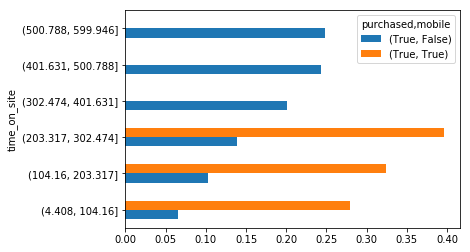

In [0]:
crosstab_final.plot(kind='barh');

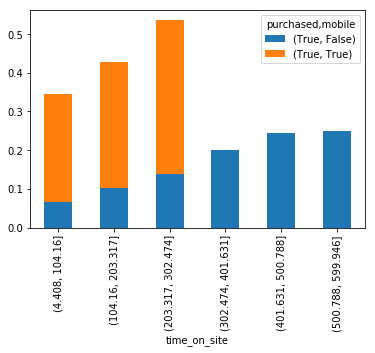

In [0]:
crosstab_final.plot(kind='bar', stacked=True);

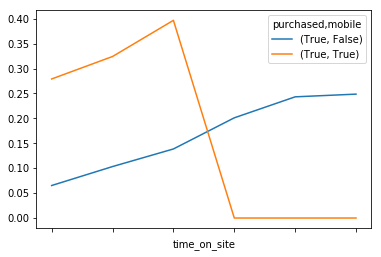

In [0]:
crosstab_final.plot();

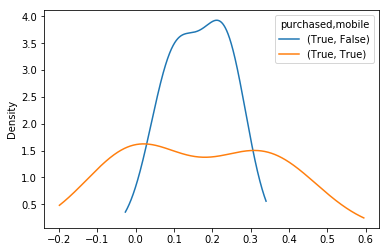

In [0]:
crosstab_final.plot.density();

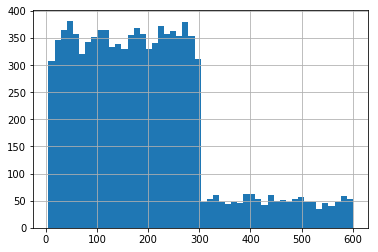

In [0]:
user_data['time_on_site'].hist(bins=50);

In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?